# Publication figures for competition use case - Multiome data
Stripplots

In [1]:
# Imports
import os
import anndata as ad
import numpy as np
import pandas as pd
import scib
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import matplotlib.font_manager as fm

Matplotlib is building the font cache; this may take a moment.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
scib.__version__

'1.0.1'

In [4]:
plt.style.use('seaborn-colorblind')
plt.rcParams['font.size'] = '12'

In [5]:
# Need to remove chached fonts

In [6]:
! rm ~/.cache/matplotlib -rf

In [7]:
font_dirs = ["miniconda3/envs/scib_v1.0.1_min/fonts"]  # The path to the custom font file.
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [8]:
# change font
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"

In [9]:
plt.rcParams['figure.figsize']

[6.0, 4.0]

In [10]:
plt.rcParams['figure.figsize'] = [6.0*4/5, 4.0*4/5]

# Multiome
All these models no cap on epochs!
- CVAE 5 seeds (sample)
- BAVAE 5 seeds (sample)
- BAVAE 1 seed (site)
- BAVAE concat 5 seeds (sample)
- BAVAE rna only 5 seeds (sample) (20 dims)
- BAVAE atac only 5 seeds (sample) (20 dims)
- VAE 1 seed
- MultiVI default 16 dims  5 seeds (sample) 
- MultiVI no filtering 16 dims 5 seeds (sample)
- Winner 64 dims 5 seeds (sample)
- CDVAE 5 seeds (sample) - conditional decoder only
- CEVAE 5 seeds (sample) - conditional encoder only
- batchVAE 5 seeds (sample) - only batch specific parameters
- scVI bn 5 seeds (sample)
- scVI ln 5 seeds (sample)
- scVI ln 5 seeds (sample) (20 dims)

## Adversarial investigations
- AVAE_x1 5 seeds (sample)
- AVAE_x50 5 seeds (sample)
- AVAE_x100 5 seeds (sample)
- AVAE_x1000 5 seeds (sample)
- BAVAE_x50 5 seeds (sample)
- BAVAE_x100 5 seeds (sample)
- BAVAE_x1000 5 seeds (sample)
- BAVAE_x5 5 seeds (sample) (revisions r1)
- BAVAE_x10 5 seeds (sample) (revisions r1)
- BAVAE_x25 5 seeds (sample) (revisions r1)

## Subsampling
- BAVAE rna only 1 seed (sample) (10 dims) (this is the counterpart for the subsamles atac models for the concat models!)
- BAVAE atac only 25% 1 seed, 5 different atac subsamples (sample)
- BAVAE atac 25% 1 seed, 5 different atac subsamples (sample)
- BAVAE concat 25% 1 seed, 5 different atac subsamples (sample)
- BAVAE atac only 10% 1 seed, 5 different atac subsamples (sample)
- BAVAE atac 10% 1 seed, 5 different atac subsamples (sample)
- BAVAE concat 10% 1 seed, 5 different atac subsamples (sample)
- MultiVI  10% 1 seed, 5 different atac subsamples (sample)
- MultiVI  20% 1 seed, 5 different atac subsamples (sample)


Not that these moodels were trained with a different number of epochs as for challenge (upper limit set to X to not hit the time limit for the run).



In [11]:
# Multiome

In [12]:
scores = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_all_models.csv", index_col=0)

In [13]:
scores_AVAE_1000 = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_all_models_x1000.csv", index_col=0)

In [14]:
scores_AVAE_100 = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_all_models_x100.csv", index_col=0)

In [15]:
scores_AVAE_50 = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_all_models_x50_x1.csv", index_col=0)

In [16]:
scores_subsampling_10 = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_atac_subsampling_10%_scores.csv", index_col=0)

In [17]:
scores_subsampling = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_atac_subsampling_scores.csv", index_col=0)

In [18]:
scores_MultiVI_no_filt = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_MultiVI_no_filtering_20222006.csv", index_col=0)

In [19]:
# fixed = pd.read_csv("Evaluation/scores/Multiome/batch_removal_scores_correction_CVAE.csv", index_col=0)

In [20]:
scores_MultiVI_subsampling = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_MultiVI_subsampling_20222307.csv", index_col=0)

In [21]:
scores_CDVAE = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_CDVAEs_20222508.csv", index_col=0)

In [22]:
scores_CEVAE_batchVAE = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_CEVAEs_batchVAEs_20222608.csv", index_col=0)

In [23]:
scores_scVI = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_scVIs_20220609.csv", index_col=0)

In [24]:
scores_scVI_20dims = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_scVI_ln_20_dims_20221909.csv", index_col=0)

In [25]:
# Additional scaling parameters
scores_r1 = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_adversary_range_revisons_r1_20232410.csv", index_col=0)

In [26]:
scores = pd.concat([scores, scores_AVAE_1000, scores_AVAE_100, scores_AVAE_50, scores_subsampling, scores_subsampling_10, scores_MultiVI_no_filt, scores_MultiVI_subsampling, scores_CDVAE, scores_CEVAE_batchVAE, scores_scVI, scores_scVI_20dims, scores_r1], axis=1)


In [27]:
scores

,VAE_100_seed_0,BAVAE_site_100_seed_0,BAVAE_sample_100_seed_0,CVAE_sample_100_seed_0,BAVAE_sample_100_concat_seed_0,MultiVI_seed_0,Winner_Multiome_online_seed_0,BAVAE_sample_100_rna_only_seed_0_20dims,BAVAE_sample_100_atac_only_seed_0_20dims,BAVAE_sample_100_seed_994,...,BAVAE_sample_100_x10.0_seed_0,BAVAE_sample_100_x10.0_seed_994,BAVAE_sample_100_x10.0_seed_236,BAVAE_sample_100_x10.0_seed_71,BAVAE_sample_100_x10.0_seed_415,BAVAE_sample_100_x25.0_seed_0,BAVAE_sample_100_x25.0_seed_994,BAVAE_sample_100_x25.0_seed_236,BAVAE_sample_100_x25.0_seed_71,BAVAE_sample_100_x25.0_seed_415
dims,20.000000,20.000000,20.000000,20.000000,20.000000,16.000000,64.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
iLISI_batch,0.064538,0.181652,0.278258,0.278950,0.275907,0.304715,0.172951,0.287947,0.309809,0.283846,...,0.320414,0.316732,0.317886,0.318417,0.318063,0.320355,0.319397,0.317181,0.316866,0.318037
cLISI_full,0.996230,0.995128,0.994862,0.994930,0.994641,0.993427,0.986050,0.993487,0.991430,0.994848,...,0.994116,0.994695,0.994413,0.994434,0.994804,0.993945,0.993473,0.993092,0.993073,0.993895
asw_batch,0.854741,0.870043,0.862412,0.867761,0.876146,0.843338,0.933637,0.866266,0.836155,0.855988,...,0.864810,0.859502,0.863878,0.863381,0.858199,0.867019,0.869415,0.872167,0.868955,0.868432
asw_label,0.557622,0.580742,0.597651,0.597209,0.588137,0.580226,0.527120,0.599591,0.595379,0.597820,...,0.589355,0.599895,0.601315,0.596586,0.593966,0.602630,0.594096,0.583413,0.581542,0.592151
cc_cons,0.885301,0.844090,0.821761,0.853588,0.768055,0.753206,0.797036,0.911111,0.769118,0.793428,...,0.800673,0.852032,0.846687,0.833863,0.872393,0.837768,0.832218,0.847483,0.848029,0.854856
graph_conn,0.962194,0.968775,0.963022,0.963548,0.960315,0.962565,0.976201,0.966779,0.942365,0.966483,...,0.961543,0.960037,0.963536,0.960595,0.960045,0.960876,0.962227,0.960126,0.959508,0.963330
nmi,0.665860,0.771407,0.776813,0.770447,0.770930,0.743452,0.749142,0.777652,0.746651,0.757215,...,0.772819,0.764585,0.767947,0.763056,0.768838,0.771476,0.758834,0.770696,0.754230,0.763163
ti_cons_batch_gex,0.960963,0.963448,0.969973,0.966801,0.967869,0.963725,0.953171,0.977416,0.941312,0.965168,...,0.969380,0.969446,0.965712,0.949984,0.963216,0.963075,0.966662,0.969109,0.970434,0.965724
ti_cons_batch_adt_atac,0.845086,0.852838,0.858047,0.850423,0.859813,0.854514,0.828871,0.858261,0.840976,0.852857,...,0.860673,0.857735,0.851467,0.845581,0.853498,0.851608,0.856858,0.854886,0.856838,0.860953


In [28]:
scores.rename(index={"asw_batch": "asw_batch_sample", "asw_site": "asw_batch_site", "iLISI_batch": "iLISI_sample"}, inplace=True)

In [29]:
scores.rename(index={"ti_cons_batch_mean": "ti_cons"}, inplace=True)

<AxesSubplot:>

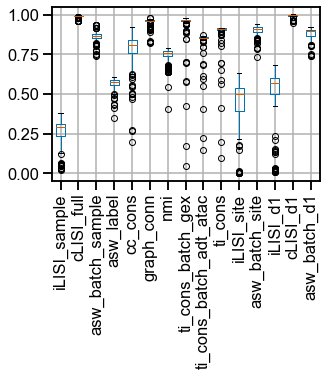

In [30]:
scores.drop("dims").T.boxplot(rot=90)

In [31]:
scores.shape

(16, 163)

In [32]:
scores = scores.T

In [33]:
scores['Model'] = scores.index.map(lambda x:
                                   'scVI bn' if 'scVI_bn' in x else
                                   'scVI ln (20 dims)' if (('scVI_ln' in x) & ('20dims' in x)) else
                                   'scVI ln' if 'scVI_ln' in x else
                                   'Liam CDVAE' if 'CDVAE' in x else
                                   'Liam CEVAE' if 'CEVAE' in x else
                                   'Liam batchVAE' if 'batchVAE' in x else
                                   'Liam atac only (10 dims, 25% atac)' if '25_atac_only' in x else
                                   'Liam concat (25% atac)' if '25_concat' in x else
                                   'MultiVI (25% atac)' if 'MultiVI_25' in x else
                                   'Liam (25% atac)' if '25_' in x else
                                   'Liam atac only (10 dims, 10% atac)' if '10_atac_only' in x else
                                   'Liam concat (10% atac)' if '10_concat' in x else
                                   'Liam (10% atac)' if 'sample_10_seed' in x else
                                   'Liam rna only (10 dims)' if ('BAVAE_sample_100_rna_only_seed_0' in x) & ('20dims' not in x )else 
                                   'Liam x1000' if 'BAVAE_sample_100_x1000' in x else
                                   'Liam AVAE x1000' if 'AVAE_sample_100_x1000' in x else
                                   'Liam x100' if 'BAVAE_sample_100_x100' in x else
                                   'Liam AVAE x100' if 'AVAE_sample_100_x100' in x else
                                   'Liam x50' if 'BAVAE_sample_100_x50' in x else
                                   'Liam AVAE x50' if 'AVAE_sample_100_x50' in x else
                                   'Liam x25' if 'BAVAE_sample_100_x25' in x else
                                   'Liam x10' if 'BAVAE_sample_100_x10' in x else
                                   'Liam x5' if 'BAVAE_sample_100_x5' in x else
                                   'Liam AVAE x1' if 'AVAE_sample_100_x1' in x else
                                   'MultiVI (no feature preselection)' if 'MultiVI_no_filt' in x else
                                   'MultiVI (10% atac)' if 'MultiVI_10' in x else
                                   'MultiVI' if 'MultiVI' in x else
                                   'LSL_AE' if 'Winner' in x else
                                   'Liam site' if 'site' in x else 
                                   'Liam rna only' if ('rna' in x) & ('20dims' in x) else 
                                   'Liam atac only' if ('atac' in x) & ('20dims' in x) else
                                   'Liam concat' if 'concat' in x else 
                                   'Liam CVAE' if 'CVAE' in x else 
                                   'Liam' if 'BAVAE' in x else 
                                   'Liam VAE')

In [34]:
scores['Model'].value_counts()

Liam (25% atac)                       5
Liam concat (25% atac)                5
Liam x10                              5
Liam x5                               5
scVI ln (20 dims)                     5
scVI ln                               5
scVI bn                               5
Liam batchVAE                         5
Liam CEVAE                            5
Liam CDVAE                            5
MultiVI (25% atac)                    5
MultiVI (10% atac)                    5
MultiVI (no feature preselection)     5
Liam concat (10% atac)                5
Liam (10% atac)                       5
Liam atac only (10 dims, 10% atac)    5
Liam x25                              5
Liam x1000                            5
Liam CVAE                             5
Liam                                  5
Liam AVAE x1                          5
Liam AVAE x50                         5
Liam x50                              5
Liam AVAE x100                        5
Liam x100                             5


In [35]:
# Added 2023-25-10

<Figure size 2880x1920 with 0 Axes>

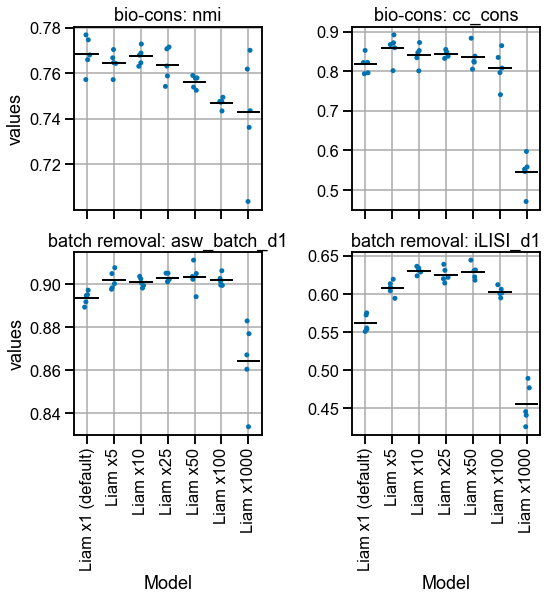

In [46]:
# Figure 3b - stripplot
# 'nmi', 'cc_cons'
fig = plt.figure(dpi=600)

subset = scores[((scores['Model']== 'Liam') |
                 (scores['Model']== 'Liam x5') |
                 (scores['Model']== 'Liam x10') |
                 (scores['Model']== 'Liam x25') |
                 (scores['Model']== 'Liam x50') |
                 (scores['Model']== 'Liam x100') |
                 (scores['Model']== 'Liam x1000')
                )]

subset['Model'] = subset['Model'].apply(lambda x: 'Liam x1 (default)' if x == 'Liam' else x) 
# Enforce specific ordering
cat_type = CategoricalDtype(categories=['Liam x1 (default)', 'Liam x5', 'Liam x10', 'Liam x25', 'Liam x50', 'Liam x100', 'Liam x1000'], ordered=True)
subset['Model'] = subset['Model'].astype(cat_type)

# Reformat for sns compatibility to long format
subset_long = subset[['nmi', 'cc_cons', 'asw_batch_d1', 'iLISI_d1', 'Model']]
subset_long = pd.melt(subset_long, id_vars='Model', var_name='metric', value_name='values', ignore_index=False)
subset_long['metric'] = subset_long['metric'].map(lambda x: {'asw_label': 'bio-cons: asw_label',\
                                                            'nmi': 'bio-cons: nmi',\
                                                            'cc_cons': 'bio-cons: cc_cons',\
                                                            'ti_cons': 'bio-cons: ti_cons',\
                                                            'asw_batch_d1': 'batch removal: asw_batch_d1',\
                                                            'iLISI_d1': 'batch removal: iLISI_d1',\
                                                            'Model': 'Model'}[x])
# Plotting
aspect = len(subset_long['Model'].unique())/3*0.5
g = sns.FacetGrid(subset_long, col='metric', col_wrap=2, height=3.5, sharey=False, despine=False, aspect=aspect)
g.map(sns.stripplot, 'Model', 'values', jitter=True)#, hue='Model')
# https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot
g.map(sns.boxplot, 'Model', 'values', showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
g.map(plt.grid, color='darkgrey')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# https://github.com/mwaskom/seaborn/issues/867

g.set_titles(col_template='{col_name}')

plt.suptitle('')
fig.tight_layout()
plt.savefig('./figures/CU_base_Fig3_stripplot_adversarial.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()



<Figure size 2880x1920 with 0 Axes>

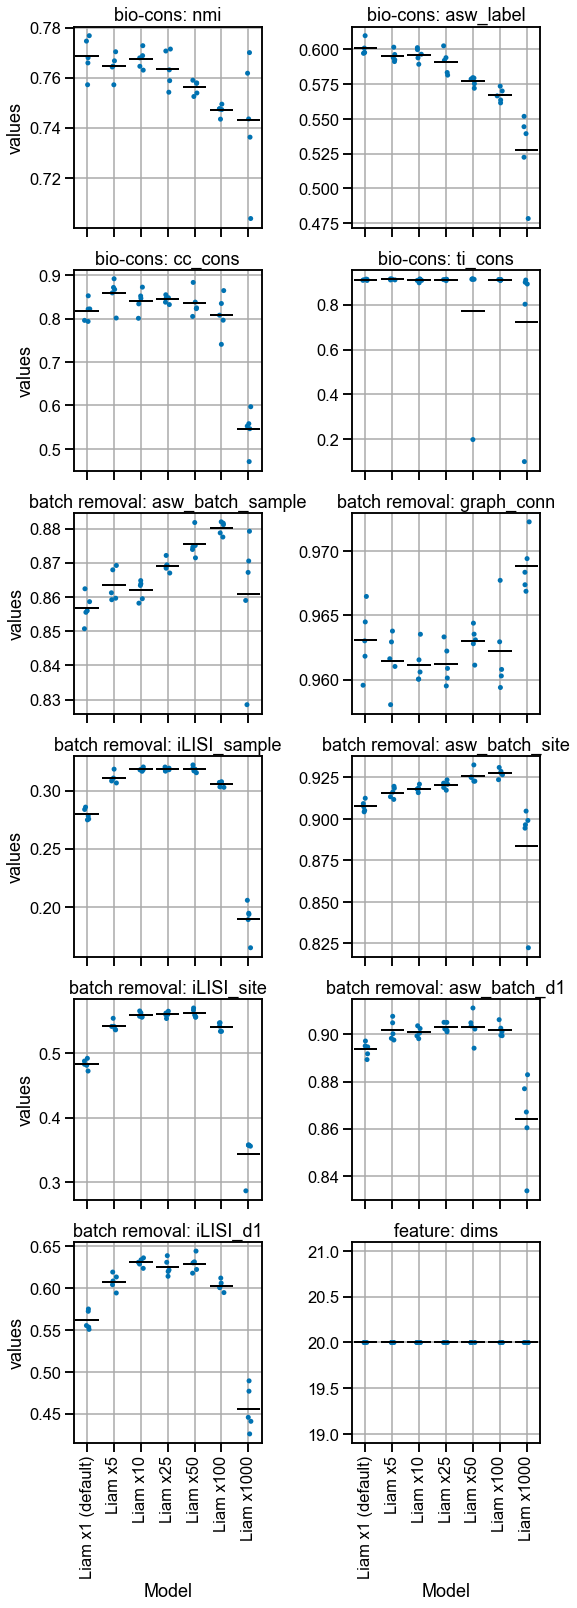

In [37]:
# Figure 3b - stripplot -full
# 'nmi', 'cc_cons'
fig = plt.figure(dpi=600)

subset = scores[((scores['Model']== 'Liam') |
                 (scores['Model']== 'Liam x5') |
                 (scores['Model']== 'Liam x10') |
                 (scores['Model']== 'Liam x25') |
                 (scores['Model']== 'Liam x50') |
                 (scores['Model']== 'Liam x100') |
                 (scores['Model']== 'Liam x1000')
                )]

subset['Model'] = subset['Model'].apply(lambda x: 'Liam x1 (default)' if x == 'Liam' else x) 
# Enforce specific ordering
cat_type = CategoricalDtype(categories=['Liam x1 (default)', 'Liam x5', 'Liam x10', 'Liam x25', 'Liam x50', 'Liam x100', 'Liam x1000'], ordered=True)
subset['Model'] = subset['Model'].astype(cat_type)

# Reformat for sns compatibility to long format
subset_long = subset[['nmi', 'asw_label', 'cc_cons', 'ti_cons', 'asw_batch_sample', 'graph_conn', 'iLISI_sample',
                                    'asw_batch_site', 'iLISI_site','asw_batch_d1', 'iLISI_d1', 'dims', 'Model']]
subset_long = pd.melt(subset_long, id_vars='Model', var_name='metric/feature', value_name='values', ignore_index=False)
subset_long['metric/feature'] = subset_long['metric/feature'].map(lambda x: {'asw_label': 'bio-cons: asw_label',\
                                                            'nmi': 'bio-cons: nmi',\
                                                            'cc_cons': 'bio-cons: cc_cons',\
                                                            'ti_cons': 'bio-cons: ti_cons',\
                                                            'asw_batch_sample': 'batch removal: asw_batch_sample',\
                                                            'graph_conn': 'batch removal: graph_conn',\
                                                            'iLISI_sample': 'batch removal: iLISI_sample',\
                                                            'asw_batch_site': 'batch removal: asw_batch_site',\
                                                            'iLISI_site': 'batch removal: iLISI_site',\
                                                            'asw_batch_d1': 'batch removal: asw_batch_d1',\
                                                            'iLISI_d1': 'batch removal: iLISI_d1',\
                                                            'dims': 'feature: dims',\
                                                            'Model': 'Model'}[x])

# Plotting
aspect = len(subset_long['Model'].unique())/3*0.5
g = sns.FacetGrid(subset_long, col='metric/feature', col_wrap=2, height=3.5, sharey=False, despine=False, aspect=aspect)
g.map(sns.stripplot, 'Model', 'values', jitter=True)#, hue='Model')
# https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot
g.map(sns.boxplot, 'Model', 'values', showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
g.map(plt.grid, color='darkgrey')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# https://github.com/mwaskom/seaborn/issues/867

g.set_titles(col_template='{col_name}')

plt.suptitle('')
fig.tight_layout()
plt.savefig('./figures/CU_base_Fig3_stripplot_adversarial_full.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()


<Figure size 2880x1920 with 0 Axes>

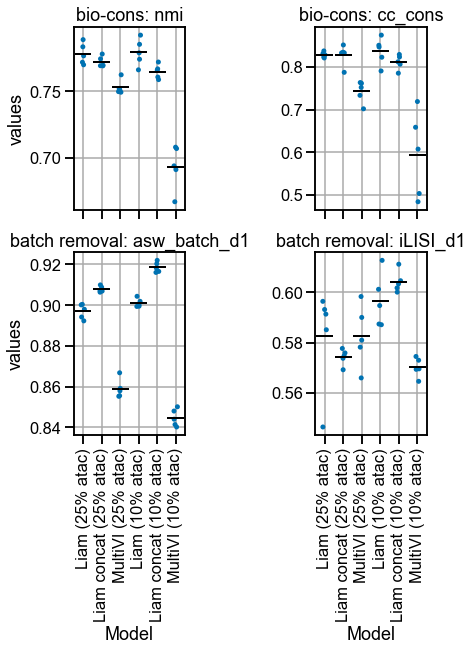

In [47]:
# Figure 3c Supplement
fig = plt.figure(dpi=600)

subset = scores[((scores['Model']== 'Liam (10% atac)') | 
                 (scores['Model']== 'Liam (25% atac)') | 
                 (scores['Model']== 'Liam concat (10% atac)') |
                 (scores['Model']== 'Liam concat (25% atac)') |
                 (scores['Model']== 'MultiVI (10% atac)') |
                 (scores['Model']== 'MultiVI (25% atac)')
                )]

# Enforce specific ordering
subset['Model'] = subset['Model'].apply(lambda x: 'Liam (default)' if x == 'Liam' else x) 
cat_type = CategoricalDtype(categories=['Liam (25% atac)', 'Liam concat (25% atac)', 'MultiVI (25% atac)',
                                        'Liam (10% atac)', 'Liam concat (10% atac)', 'MultiVI (10% atac)'
                                       ], ordered=True)
subset['Model'] = subset['Model'].astype(cat_type)

# Reformat for sns compatibility to long format
subset_long = subset[['nmi', 'cc_cons', 'asw_batch_d1', 'iLISI_d1', 'Model']]
subset_long = pd.melt(subset_long, id_vars='Model', var_name='metric', value_name='values', ignore_index=False)
subset_long['metric'] = subset_long['metric'].map(lambda x: {'asw_label': 'bio-cons: asw_label',\
                                                            'nmi': 'bio-cons: nmi',\
                                                            'cc_cons': 'bio-cons: cc_cons',\
                                                            'ti_cons': 'bio-cons: ti_cons',\
                                                            'asw_batch_d1': 'batch removal: asw_batch_d1',\
                                                            'iLISI_d1': 'batch removal: iLISI_d1',\
                                                            'Model': 'Model'}[x])
#Plotting
aspect = len(subset_long['Model'].unique())/3*0.5
g = sns.FacetGrid(subset_long, col='metric', col_wrap=2, height=3.5, sharey=False, despine=False, aspect=aspect)
g.map(sns.stripplot, 'Model', 'values', jitter=True)#, hue='Model')
# https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot
g.map(sns.boxplot, 'Model', 'values', showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
g.map(plt.grid, color='darkgrey')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# https://github.com/mwaskom/seaborn/issues/867

g.set_titles(col_template='{col_name}')

plt.suptitle('')
fig.tight_layout()
plt.savefig('./figures/CU_base_Fig3_stripplot_subsampling.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

<Figure size 2880x1920 with 0 Axes>

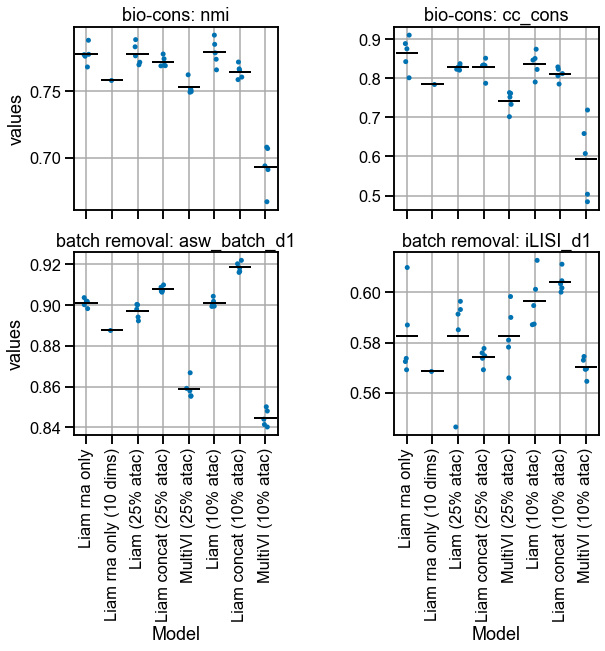

In [36]:
# Figure 3c Supplement
fig = plt.figure(dpi=600)

subset = scores[((scores['Model']== 'Liam rna only') | 
                 (scores['Model']== 'Liam rna only (10 dims)') | 
                 (scores['Model']== 'Liam (10% atac)') | 
                 (scores['Model']== 'Liam (25% atac)') | 
                 (scores['Model']== 'Liam concat (10% atac)') |
                 (scores['Model']== 'Liam concat (25% atac)') |
                 (scores['Model']== 'MultiVI (10% atac)') |
                 (scores['Model']== 'MultiVI (25% atac)')
                )]

# Enforce specific ordering
subset['Model'] = subset['Model'].apply(lambda x: 'Liam (default)' if x == 'Liam' else x) 
cat_type = CategoricalDtype(categories=['Liam rna only', 'Liam rna only (10 dims)', 'Liam (25% atac)', 'Liam concat (25% atac)', 'MultiVI (25% atac)',
                                        'Liam (10% atac)', 'Liam concat (10% atac)', 'MultiVI (10% atac)'
                                       ], ordered=True)
subset['Model'] = subset['Model'].astype(cat_type)

# Reformat for sns compatibility to long format
subset_long = subset[['nmi', 'cc_cons', 'asw_batch_d1', 'iLISI_d1', 'Model']]
subset_long = pd.melt(subset_long, id_vars='Model', var_name='metric', value_name='values', ignore_index=False)
subset_long['metric'] = subset_long['metric'].map(lambda x: {'asw_label': 'bio-cons: asw_label',\
                                                            'nmi': 'bio-cons: nmi',\
                                                            'cc_cons': 'bio-cons: cc_cons',\
                                                            'ti_cons': 'bio-cons: ti_cons',\
                                                            'asw_batch_d1': 'batch removal: asw_batch_d1',\
                                                            'iLISI_d1': 'batch removal: iLISI_d1',\
                                                            'Model': 'Model'}[x])
#Plotting
aspect = len(subset_long['Model'].unique())/3*0.5
g = sns.FacetGrid(subset_long, col='metric', col_wrap=2, height=3.5, sharey=False, despine=False, aspect=aspect)
g.map(sns.stripplot, 'Model', 'values', jitter=True)#, hue='Model')
# https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot
g.map(sns.boxplot, 'Model', 'values', showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
g.map(plt.grid, color='darkgrey')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# https://github.com/mwaskom/seaborn/issues/867

g.set_titles(col_template='{col_name}')

plt.suptitle('')
fig.tight_layout()
plt.savefig('./figures/CU_base_Fig3_stripplot_subsampling_alt.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

<Figure size 2880x1920 with 0 Axes>

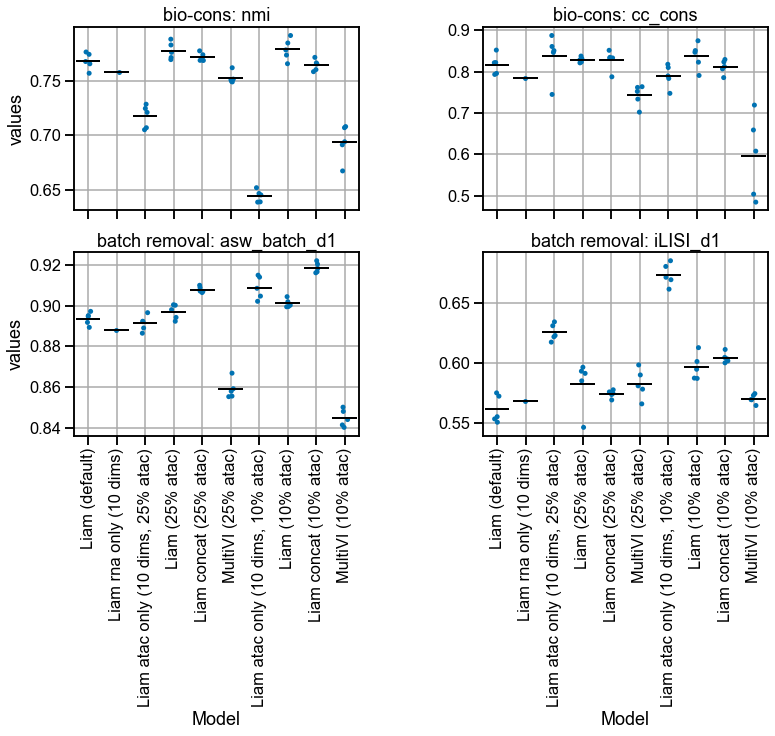

In [48]:
# Figure 3c Supplement
fig = plt.figure(dpi=600)

subset = scores[((scores['Model']== 'Liam') |
                 (scores['Model']== 'Liam (10% atac)') | 
                 (scores['Model']== 'Liam (25% atac)') | 
                 (scores['Model']== 'Liam atac only (10 dims, 10% atac)') |
                 (scores['Model']== 'Liam atac only (10 dims, 25% atac)') |
                 (scores['Model']== 'Liam rna only (10 dims)') |
                 (scores['Model']== 'Liam concat (10% atac)') |
                 (scores['Model']== 'Liam concat (25% atac)') |
                 (scores['Model']== 'MultiVI (10% atac)') |
                 (scores['Model']== 'MultiVI (25% atac)')
                )]

# Enforce specific ordering
subset['Model'] = subset['Model'].apply(lambda x: 'Liam (default)' if x == 'Liam' else x) 
cat_type = CategoricalDtype(categories=['Liam (default)', 'Liam rna only (10 dims)',
                                        'Liam atac only (10 dims, 25% atac)', 'Liam (25% atac)',
                                        'Liam concat (25% atac)', 'MultiVI (25% atac)',
                                        'Liam atac only (10 dims, 10% atac)', 'Liam (10% atac)',
                                        'Liam concat (10% atac)', 'MultiVI (10% atac)'
                                       ], ordered=True)
subset['Model'] = subset['Model'].astype(cat_type)

# Reformat for sns compatibility to long format
subset_long = subset[['nmi', 'cc_cons', 'asw_batch_d1', 'iLISI_d1', 'Model']]
subset_long = pd.melt(subset_long, id_vars='Model', var_name='metric', value_name='values', ignore_index=False)
subset_long['metric'] = subset_long['metric'].map(lambda x: {'asw_label': 'bio-cons: asw_label',\
                                                            'nmi': 'bio-cons: nmi',\
                                                            'cc_cons': 'bio-cons: cc_cons',\
                                                            'ti_cons': 'bio-cons: ti_cons',\
                                                            'asw_batch_d1': 'batch removal: asw_batch_d1',\
                                                            'iLISI_d1': 'batch removal: iLISI_d1',\
                                                            'Model': 'Model'}[x])
#Plotting
aspect = len(subset_long['Model'].unique())/3*0.5
g = sns.FacetGrid(subset_long, col='metric', col_wrap=2, height=3.5, sharey=False, despine=False, aspect=aspect)
g.map(sns.stripplot, 'Model', 'values', jitter=True)#, hue='Model')
# https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot
g.map(sns.boxplot, 'Model', 'values', showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
g.map(plt.grid, color='darkgrey')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# https://github.com/mwaskom/seaborn/issues/867

g.set_titles(col_template='{col_name}')

plt.suptitle('')
fig.tight_layout()
plt.savefig('./figures/CU_base_Fig3_stripplot_subsampling_supp.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

<Figure size 2880x1920 with 0 Axes>

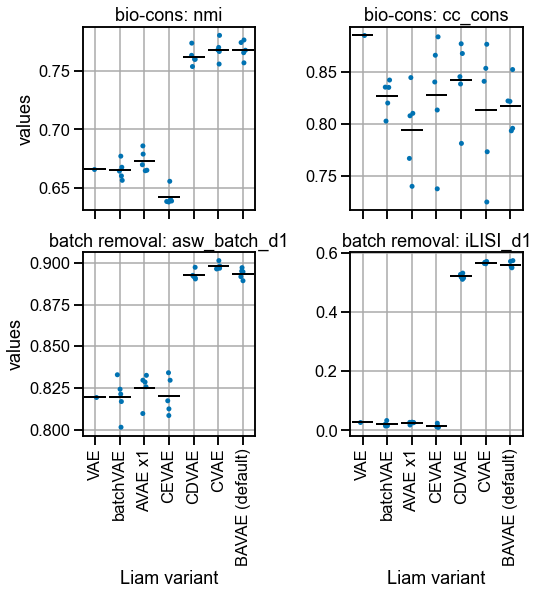

In [49]:
# Figure 3a - stripplot
fig = plt.figure(dpi=600)
subset = scores[((scores['Model']== 'Liam') |
                 (scores['Model']== 'Liam VAE') | 
                 (scores['Model']== 'Liam batchVAE') | 
                 (scores['Model']== 'Liam CEVAE') |
                 (scores['Model']== 'Liam CDVAE') |
                 (scores['Model']== 'Liam CVAE') |
                 (scores['Model']== 'Liam AVAE x1')
               )]

# Enforce specific ordering
subset['Model'] = subset['Model'].apply(lambda x: 'Liam BAVAE (default)' if x == 'Liam' else x) 
subset['Model'] = subset['Model'].apply(lambda x: ' '.join(x.split(' ')[1:])) 
cat_type = CategoricalDtype(categories=['VAE', 'batchVAE', 'AVAE x1', 'CEVAE', 'CDVAE', 'CVAE', 'BAVAE (default)'
                                       ], ordered=True)
subset['Model'] = subset['Model'].astype(cat_type)
subset.rename({'Model': 'Liam variant'}, inplace=True, axis=1)

# Reformat for sns compatibility to long format
subset_long = subset[['nmi', 'cc_cons', 'asw_batch_d1', 'iLISI_d1', 'Liam variant']]
subset_long = pd.melt(subset_long, id_vars='Liam variant', var_name='metric', value_name='values', ignore_index=False)
subset_long['metric'] = subset_long['metric'].map(lambda x: {'asw_label': 'bio-cons: asw_label',\
                                                            'nmi': 'bio-cons: nmi',\
                                                            'cc_cons': 'bio-cons: cc_cons',\
                                                            'ti_cons': 'bio-cons: ti_cons',\
                                                            'asw_batch_d1': 'batch removal: asw_batch_d1',\
                                                            'iLISI_d1': 'batch removal: iLISI_d1',\
                                                            'Model': 'Model'}[x])
  
# Plotting
aspect = len(subset_long['Liam variant'].unique())/3*0.5
g = sns.FacetGrid(subset_long, col='metric', col_wrap=2, height=3.5, sharey=False, despine=False, aspect=aspect)
g.map(sns.stripplot, 'Liam variant', 'values', jitter=True)#, hue='Model')
# https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot
g.map(sns.boxplot, 'Liam variant', 'values', showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
g.map(plt.grid, color='darkgrey')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# https://github.com/mwaskom/seaborn/issues/867

g.set_titles(col_template='{col_name}')

plt.suptitle('')
fig.tight_layout()
plt.savefig('./figures/CU_base_Fig3_stripplot_ablation.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

<Figure size 2880x1920 with 0 Axes>

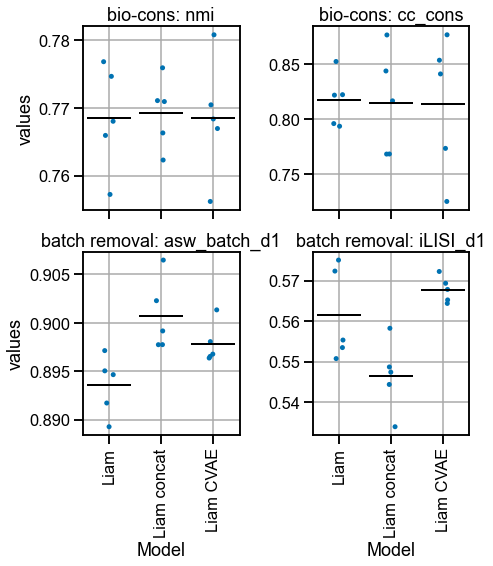

In [40]:
# Figure S1 - stripplot
fig = plt.figure(dpi=600)

subset = scores[((scores['Model']== 'Liam') |
                 (scores['Model']== 'Liam concat') |
                 (scores['Model']== 'Liam CVAE')
                )]

# Enforce specific ordering
cat_type = CategoricalDtype(categories=['Liam', 'Liam concat', 'Liam CVAE'], ordered=True)
subset['Model'] = subset['Model'].astype(cat_type)

# Reformat for sns compatibility to long format
subset_long = subset[['nmi', 'cc_cons', 'asw_batch_d1', 'iLISI_d1', 'Model']]
subset_long = pd.melt(subset_long, id_vars='Model', var_name='metric', value_name='values', ignore_index=False)
subset_long['metric'] = subset_long['metric'].map(lambda x: {'asw_label': 'bio-cons: asw_label',\
                                                            'nmi': 'bio-cons: nmi',\
                                                            'cc_cons': 'bio-cons: cc_cons',\
                                                            'ti_cons': 'bio-cons: ti_cons',\
                                                            'asw_batch_d1': 'batch removal: asw_batch_d1',\
                                                            'iLISI_d1': 'batch removal: iLISI_d1',\
                                                            'Model': 'Model'}[x])

# Plotting
g = sns.FacetGrid(subset_long, col='metric', col_wrap=2, height=3.5, sharey=False, despine=False, aspect=1)
g.map(sns.stripplot, 'Model', 'values', jitter=True)#, hue='Model')
# https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot
g.map(sns.boxplot, 'Model', 'values', showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
g.map(plt.grid, color='darkgrey')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# https://github.com/mwaskom/seaborn/issues/867

g.set_titles(col_template='{col_name}')

plt.suptitle('')
fig.tight_layout()
plt.savefig('./figures/CU_base_stripplot_baseline_architecture.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

<Figure size 2880x1920 with 0 Axes>

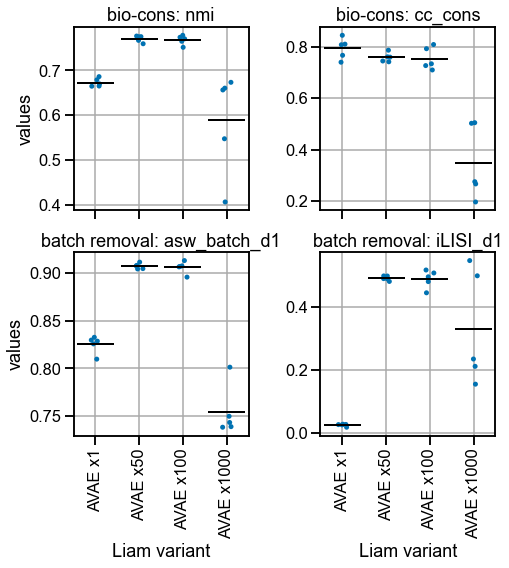

In [41]:
# Figure S2 - stripplot
fig = plt.figure(dpi=600)

subset = scores[((scores['Model']== 'Liam AVAE x1') |
                 (scores['Model']== 'Liam AVAE x50') |
                 (scores['Model']== 'Liam AVAE x100') |
                 (scores['Model']== 'Liam AVAE x1000')
                )]

# Enforce specific ordering
subset['Model'] = subset['Model'].apply(lambda x: ' '.join(x.split(' ')[1:])) 

cat_type = CategoricalDtype(categories=['AVAE x1', 'AVAE x50', 'AVAE x100', 'AVAE x1000'], ordered=True)
subset['Model'] = subset['Model'].astype(cat_type)
subset.rename({'Model': 'Liam variant'}, inplace=True, axis=1)

# Reformat for sns compatibility to long format
subset_long = subset[['nmi', 'cc_cons', 'asw_batch_d1', 'iLISI_d1', 'Liam variant']]
subset_long = pd.melt(subset_long, id_vars='Liam variant', var_name='metric', value_name='values', ignore_index=False)
subset_long['metric'] = subset_long['metric'].map(lambda x: {'asw_label': 'bio-cons: asw_label',\
                                                            'nmi': 'bio-cons: nmi',\
                                                            'cc_cons': 'bio-cons: cc_cons',\
                                                            'ti_cons': 'bio-cons: ti_cons',\
                                                            'asw_batch_d1': 'batch removal: asw_batch_d1',\
                                                            'iLISI_d1': 'batch removal: iLISI_d1',\
                                                            'Model': 'Model'}[x])

# Plotting
aspect = len(subset_long['Liam variant'].unique())/3*0.8
g = sns.FacetGrid(subset_long, col='metric', col_wrap=2, height=3.5, sharey=False, despine=False, aspect=aspect)
g.map(sns.stripplot, 'Liam variant', 'values', jitter=True)#, hue='Model')
# https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot
g.map(sns.boxplot, 'Liam variant', 'values', showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
g.map(plt.grid, color='darkgrey')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# https://github.com/mwaskom/seaborn/issues/867

g.set_titles(col_template='{col_name}')

plt.suptitle('')
fig.tight_layout()
plt.savefig('./figures/CU_base_stripplot_AVAE.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

<Figure size 2880x1920 with 0 Axes>

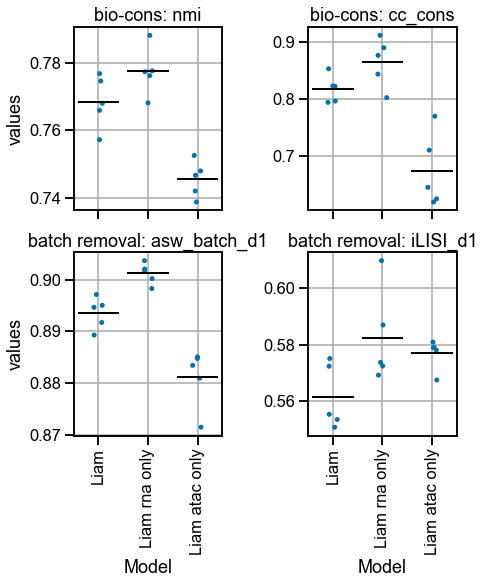

In [42]:
# Figure S4 - stripplot
fig = plt.figure(dpi=600)

subset = scores[((scores['Model']== 'Liam') |
                 (scores['Model']== 'Liam rna only') |
                 (scores['Model']== 'Liam atac only') 
                )]

# Enforce specific ordering
cat_type = CategoricalDtype(categories=['Liam', 'Liam rna only', 'Liam atac only'], ordered=True)
subset['Model'] = subset['Model'].astype(cat_type)

# Reformat for sns compatibility to long format
subset_long = subset[['nmi', 'cc_cons', 'asw_batch_d1', 'iLISI_d1', 'Model']]
subset_long = pd.melt(subset_long, id_vars='Model', var_name='metric', value_name='values', ignore_index=False)
subset_long['metric'] = subset_long['metric'].map(lambda x: {'asw_label': 'bio-cons: asw_label',\
                                                            'nmi': 'bio-cons: nmi',\
                                                            'cc_cons': 'bio-cons: cc_cons',\
                                                            'ti_cons': 'bio-cons: ti_cons',\
                                                            'asw_batch_d1': 'batch removal: asw_batch_d1',\
                                                            'iLISI_d1': 'batch removal: iLISI_d1',\
                                                            'Model': 'Model'}[x])

# Plotting
g = sns.FacetGrid(subset_long, col='metric', col_wrap=2, height=3.5, sharey=False, despine=False, aspect=1)
g.map(sns.stripplot, 'Model', 'values', jitter=True)#, hue='Model')
# https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot
g.map(sns.boxplot, 'Model', 'values', showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
g.map(plt.grid, color='darkgrey')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# https://github.com/mwaskom/seaborn/issues/867

g.set_titles(col_template='{col_name}')

plt.suptitle('')
fig.tight_layout()
plt.savefig('./figures/CU_base_stripplot_baseline_single_mod.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

<Figure size 2880x1920 with 0 Axes>

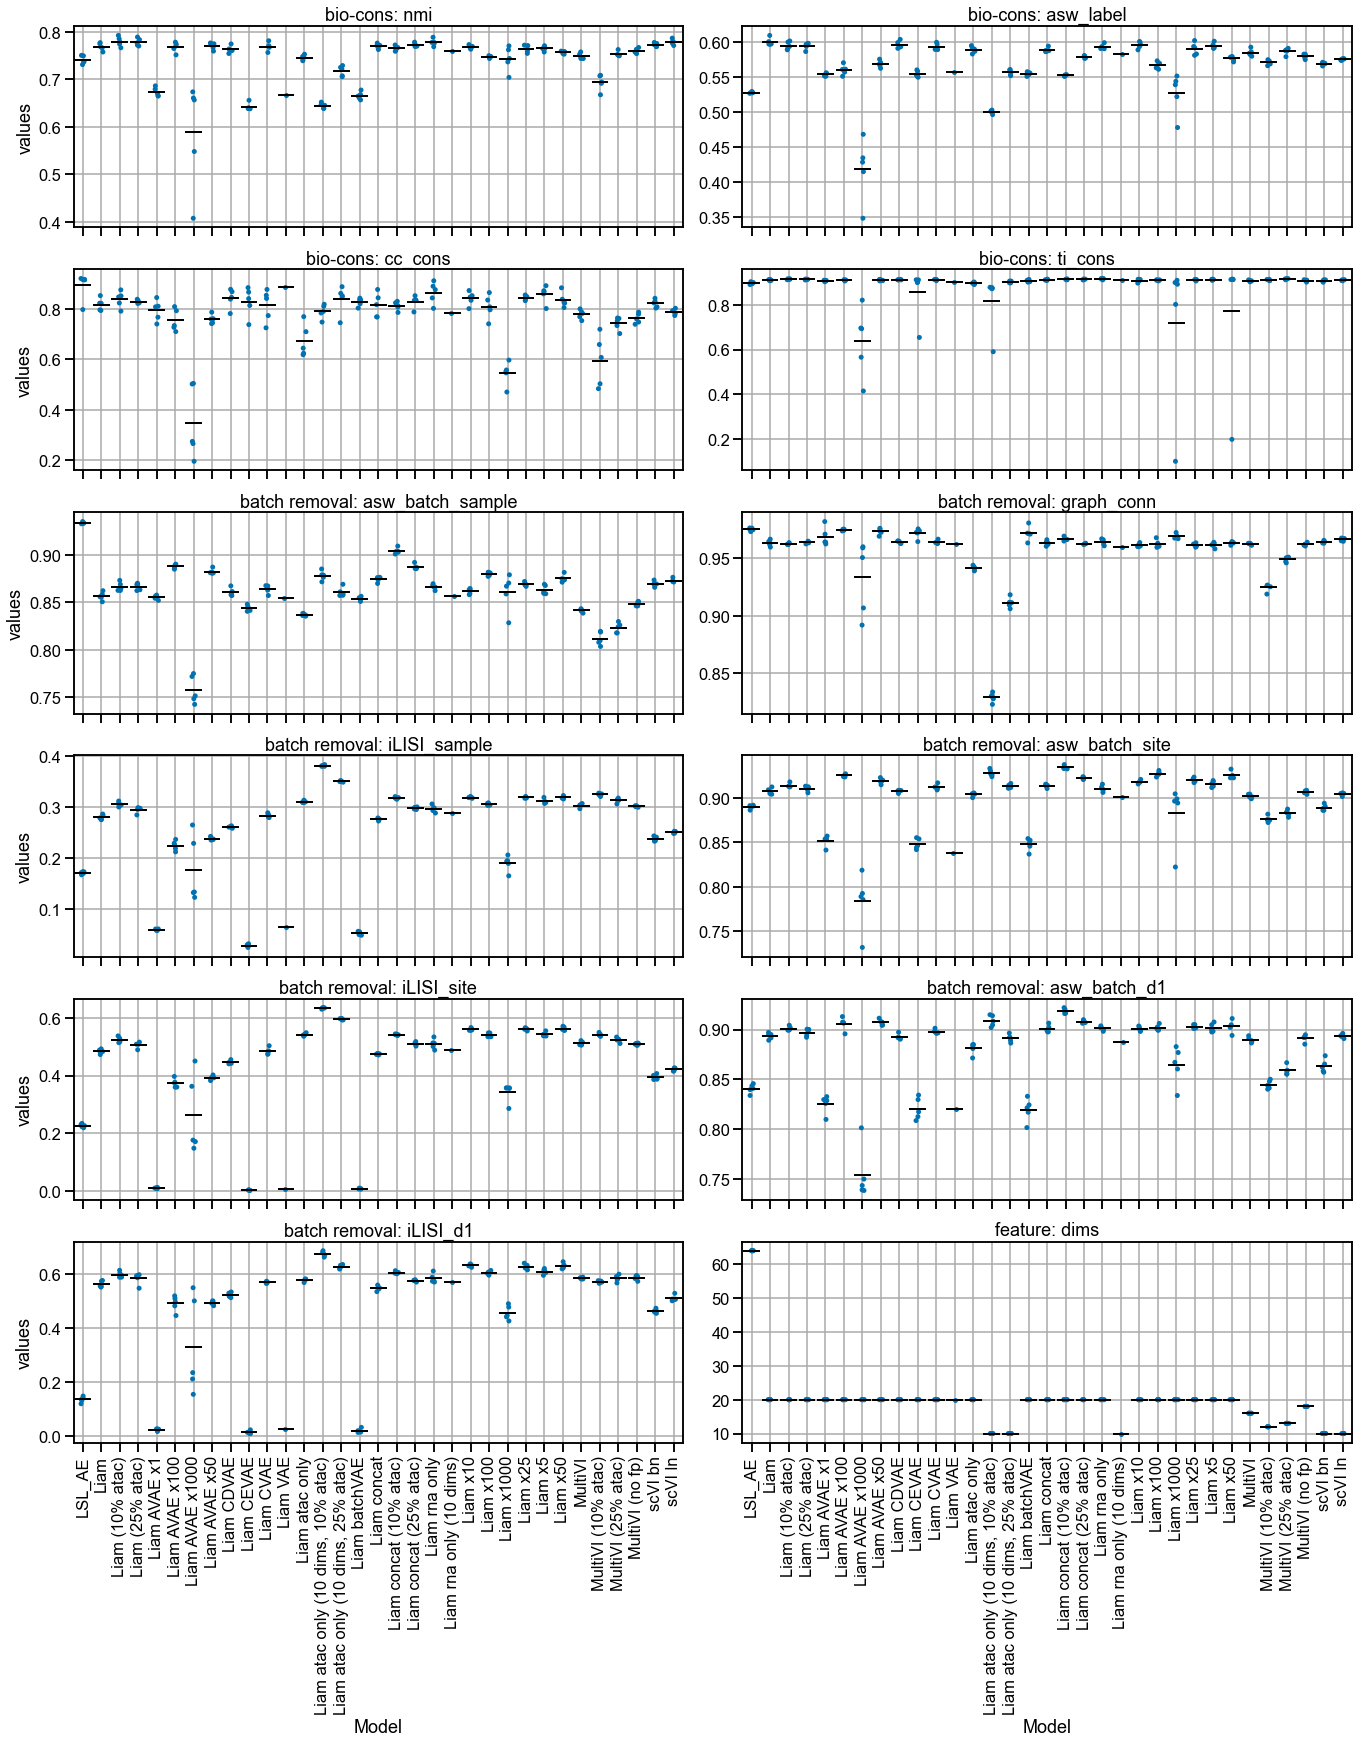

In [43]:
# Figure S6 - stripplot
fig = plt.figure(dpi=600)

subset = scores[((scores['Model']!= 'Liam site') & (scores['Model']!= 'scVI ln (20 dims)')
                )].drop(['ti_cons_batch_gex', 'ti_cons_batch_adt_atac', 'cLISI_full'], axis=1)

subset['Model'] = subset['Model'].apply(lambda x: 'MultiVI (no fp)' if x == 'MultiVI (no feature preselection)' else x)

# Enforce specific ordering
cat_type = CategoricalDtype(categories=sorted(subset['Model'].unique()), ordered=True)
subset['Model'] = subset['Model'].astype(cat_type)


# Reformat for sns compatibility to long format
subset_long = subset[['nmi', 'asw_label', 'cc_cons', 'ti_cons', 'asw_batch_sample', 'graph_conn', 'iLISI_sample',
                                    'asw_batch_site', 'iLISI_site','asw_batch_d1', 'iLISI_d1', 'dims', 'Model']]
subset_long = pd.melt(subset_long, id_vars='Model', var_name='metric/feature', value_name='values', ignore_index=False)
subset_long['metric/feature'] = subset_long['metric/feature'].map(lambda x: {'asw_label': 'bio-cons: asw_label',\
                                                            'nmi': 'bio-cons: nmi',\
                                                            'cc_cons': 'bio-cons: cc_cons',\
                                                            'ti_cons': 'bio-cons: ti_cons',\
                                                            'asw_batch_sample': 'batch removal: asw_batch_sample',\
                                                            'graph_conn': 'batch removal: graph_conn',\
                                                            'iLISI_sample': 'batch removal: iLISI_sample',\
                                                            'asw_batch_site': 'batch removal: asw_batch_site',\
                                                            'iLISI_site': 'batch removal: iLISI_site',\
                                                            'asw_batch_d1': 'batch removal: asw_batch_d1',\
                                                            'iLISI_d1': 'batch removal: iLISI_d1',\
                                                            'dims': 'feature: dims',\
                                                            'Model': 'Model'}[x])

# Plotting
aspect = len(subset_long['Model'].unique())/3*0.25
g = sns.FacetGrid(subset_long, col='metric/feature', col_wrap=2, height=3.5, sharey=False, despine=False, aspect=aspect)
g.map(sns.stripplot, 'Model', 'values', jitter=True)#, hue='Model')
# https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot
g.map(sns.boxplot, 'Model', 'values', showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
g.map(plt.grid, color='darkgrey')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# https://github.com/mwaskom/seaborn/issues/867

g.set_titles(col_template='{col_name}')


plt.suptitle('')
fig.tight_layout()
plt.savefig('./figures/CU_base_stripplot_all.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

In [44]:
scores['Model'].value_counts()

Liam (25% atac)                       5
Liam concat (25% atac)                5
Liam x10                              5
Liam x5                               5
scVI ln (20 dims)                     5
scVI ln                               5
scVI bn                               5
Liam batchVAE                         5
Liam CEVAE                            5
Liam CDVAE                            5
MultiVI (25% atac)                    5
MultiVI (10% atac)                    5
MultiVI (no feature preselection)     5
Liam concat (10% atac)                5
Liam (10% atac)                       5
Liam atac only (10 dims, 10% atac)    5
Liam x25                              5
Liam x1000                            5
Liam CVAE                             5
Liam                                  5
Liam AVAE x1                          5
Liam AVAE x50                         5
Liam x50                              5
Liam AVAE x100                        5
Liam x100                             5
